# Recognizing hand-written digits
This example is based on [sklearn documentation](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) by Gael Varoquaux

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

In [1]:
import numpy as np
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = datasets.load_digits()

The data that we are interested in is made of 8x8 images of digits, let's
have a look at the first 3 images, stored in the `images` attribute of the
dataset.  If we were working from image files, we could load them using
`pylab.imread`.  Note that each image must have the same size. For these
images, we know which digit they represent: it is given in the 'target' of
the dataset.

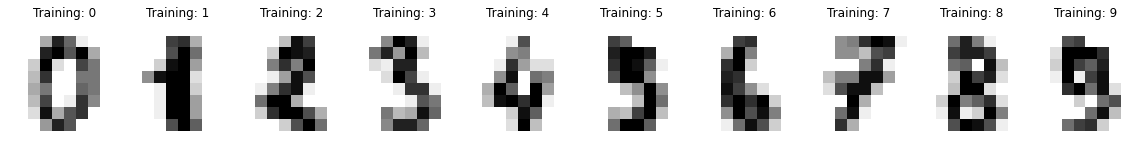

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i\n' % label)

To apply a classifier on this data, we need to flatten the image, to
turn the data in a (samples, feature) matrix:

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Create a classifier: a support vector classifier. 
- We learn the digits on the first half of the digits, and 
- we predict the value of the digit on the second half.

In [5]:
model = svm.SVC(gamma=0.001)
model.fit(data[:n_samples / 2], digits.target[:n_samples / 2])
expected = digits.target[n_samples / 2:]
predicted = model.predict(data[n_samples / 2:])
print "Accuracy", (expected == predicted).mean()

Accuracy 0.968854282536


Holy cow! Almost all digits were succesfully recognized!

Let's view a few misclassifications.

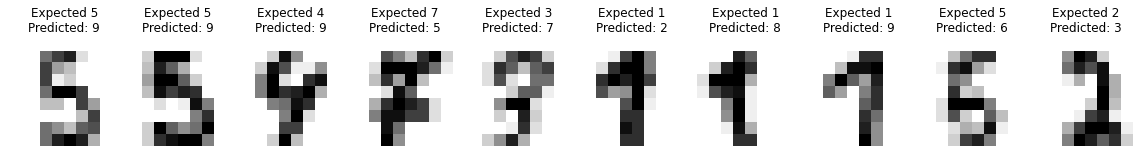

In [6]:
misclassified = (expected != predicted)
images_exp_and_pred = np.array((zip(digits.images[n_samples / 2:], expected, predicted)))[misclassified]
plt.figure(figsize=(20,4))
for index, (image, expectation, prediction) in enumerate(images_exp_and_pred[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Expected %i\nPredicted: %i\n' % (expectation, prediction))

We could use `sklearn`'s `classification_report` and `confusion_matrix` to quickly view a bunch of performance metrics.

In [7]:
print "Classification report for classifier", model.__class__.__name__, "\n"
print metrics.classification_report(expected, predicted), "\n"
print "Confusion matrix:" 
print metrics.confusion_matrix(expected, predicted)

Classification report for classifier SVC 

             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [

Not bad!